<a href="https://colab.research.google.com/github/yashc24/workshop/blob/main/PandasAdv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
ipl = pd.read_csv(r"/content/ipl-matches.csv")
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


## ***Find all the final match winners***

In [3]:
mask = ipl["MatchNumber"]=="Final"
new_df = ipl[mask]
new_df[["Season","WinningTeam"]]


,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


In [4]:
ipl[ipl["MatchNumber"] == "Final"][["Season","WinningTeam"]]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


### ***How Many Super Over Finishers have occured***

In [5]:
ipl[ipl["SuperOver"] == "Y"].shape[0]


14

### ***How many matches has CSK won in Kolkata***

In [6]:
ipl[(ipl["City"] == "Kolkata") & (ipl["WinningTeam"] == "Chennai Super Kings")].shape[0]

5

## ***Toss winner is match winner in percentage***

In [7]:
(ipl[ipl["TossWinner"] == ipl["WinningTeam"]].shape[0]/ipl.shape[0])*100

51.473684210526315

In [8]:
def head_to_head_record(df,team_a,team_b):
  mask = ((df["Team1"] == team_a) & (df["Team2"] == team_b)) | ((df["Team1"] == team_b) & (df["Team2"] == team_a))
  matches = df[mask]
  team_a_wins = (matches["WinningTeam"] == team_a).sum()
  team_b_wins = (matches["WinningTeam"] == team_b).sum()
  total_matches = len(matches)

  return {"Total Matches" : total_matches,
          f'{team_a} Wins' : team_a_wins,
          f'{team_b} Wins' : team_b_wins
          }


head_to_head_record(ipl, "kochi Tuskers Kerala", "Deccan Chargers")


{'Total Matches': 0,
 'kochi Tuskers Kerala Wins': np.int64(0),
 'Deccan Chargers Wins': np.int64(0)}

## ***Movies Data***

In [9]:
movies = pd.read_csv("/content/movies (1).csv")
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


## ***Action Movies with rating heigher than 7.5***

In [10]:
# Action movies with rating higher than 7.5
# mask1 = movies['genres'].str.split('|').apply(lambda x:'Action' in x)
condition_1 = movies['genres'].str.contains('Action')
condition_2 = movies['imdb_rating'] > 7.5

movies[condition_1 & condition_2]
len(movies[condition_1 & condition_2])

33

## ***Adding a new column in DataFrame***

In [11]:
movies["Country"] = "India"
movies.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India


## ***Dropping a Coloumn***

In [12]:
movies.drop("Country",axis=1,inplace=True)


## ***Man of the Matches/POTM in only Playoffs***

In [13]:
playoff_matches = ipl[~ipl["MatchNumber"].str.isdigit()]
poym_in_playoff = playoff_matches["Player_of_Match"]
poym_in_playoff.value_counts()

,count
Player_of_Match,
F du Plessis,3
SK Raina,3
KA Pollard,3
JJ Bumrah,2
AB de Villiers,2
MK Pandey,2
M Vijay,2
A Kumble,2
YK Pathan,2


<Axes: ylabel='count'>

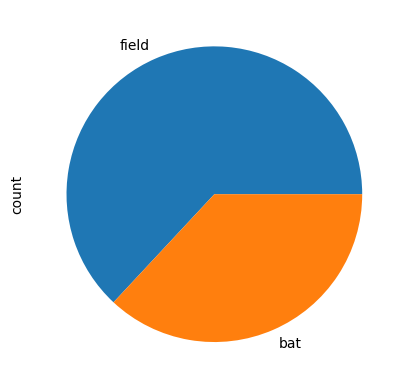

In [14]:
# toss decision plot
ipl["TossDecision"].value_counts().plot(kind="pie")

In [15]:
ipl["Team2"].value_counts()

,count
Team2,
Mumbai Indians,119
Kolkata Knight Riders,118
Rajasthan Royals,103
Royal Challengers Bangalore,100
Kings XI Punjab,98
Chennai Super Kings,97
Sunrisers Hyderabad,83
Delhi Daredevils,76
Deccan Chargers,36


In [16]:
# how many matches each team has played
(ipl["Team2"].value_counts() + ipl["Team1"].value_counts()).sort_values(ascending=False)

,count
Mumbai Indians,231
Royal Challengers Bangalore,226
Kolkata Knight Riders,223
Chennai Super Kings,208
Rajasthan Royals,192
Kings XI Punjab,190
Delhi Daredevils,161
Sunrisers Hyderabad,152
Deccan Chargers,75
Delhi Capitals,63


### ***Sort DataFrame by year of release in ascending and titile on Decending***

In [17]:
# ['B1', 'A0', 'D2', 'C1', 'A1', 'B0', 'C2', 'D0', 'B2', 'C0', 'D1', 'A2']

movies.sort_values(["year_of_release","title_x"],ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


## ***Merging/Concatenating/Joining***

In [18]:
courses = pd.read_csv('/content/courses.csv',index_col='course_id')
students = pd.read_csv('/content/students.csv',index_col='student_id')
nov = pd.read_csv('/content/reg-month1.csv')
dec = pd.read_csv('/content/reg-month2.csv')
matches = pd.read_csv('/content/matches.csv',index_col='id')
delivery = pd.read_csv('/content/deliveries.csv')

In [19]:
regs = pd.concat([nov,dec])
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [20]:
regs = pd.concat([nov,dec])
regs = pd.concat([nov,dec],ignore_index=True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [21]:
regs2 = nov.append(dec,ignore_index=True)
regs2        # NOTE : append() method for pandas DataFrame is deprecated from pandas v2.0 onwards.

AttributeError: 'DataFrame' object has no attribute 'append'

In [22]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])
multi

student_id  course_id
Nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

## ***Joins::***

In [23]:
# For Left Join - how='left',
# For Right Join - how='right',
# For Inner Join - how='inner',
# For Full Join - how='outer',

### ***1.Inner Join : Join rows having common values***

In [24]:
regs.sample(5)

,student_id,course_id
48,14,1
42,7,6
38,18,8
35,14,6
11,1,6


# ***2. Left Join***

In [25]:
courses.merge(regs,how='left',left_index=True,right_on='course_id')

,course_name,price,student_id,course_id
0.0,python,2499,23.0,1
5.0,python,2499,18.0,1
6.0,python,2499,1.0,1
9.0,python,2499,15.0,1
16.0,python,2499,21.0,1
21.0,python,2499,25.0,1
28.0,python,2499,12.0,1
48.0,python,2499,14.0,1
52.0,python,2499,38.0,1
22.0,sql,3499,19.0,2


## ***Find total revenue granted***

In [26]:
total = regs.merge(courses,how="inner",on="course_id")["price"].sum()
total

np.int64(154247)

## ***Plot bar chart for revenue/course***

<Axes: xlabel='course_name'>

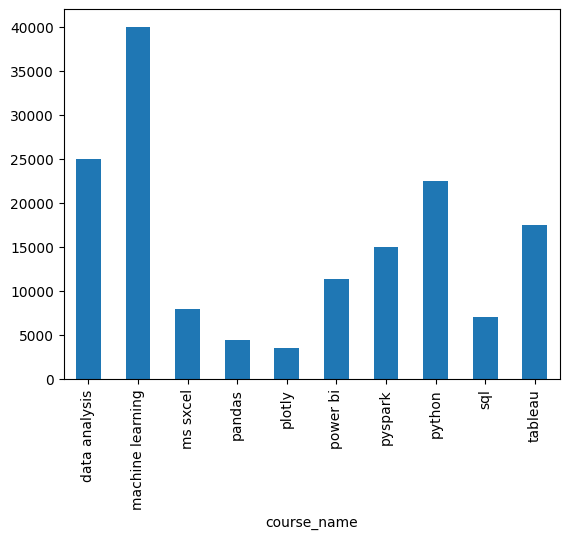

In [27]:
regs.merge(courses,how="inner",on="course_id").groupby("course_name")["price"].sum().plot(kind="bar")

### ***Find students' array who enrolled in both the monthes i.e Nov & Dec ***

In [28]:
common_student_id = np.intersect1d(nov["student_id"],dec["student_id"])
common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])

In [29]:
# lets get name of each students
students[students.index.isin(common_student_id)]["name"]

,name
student_id,
1,Kailash Harjo
3,Parveen Bhalla
7,Tarun Thaker
11,David Mukhopadhyay
16,Elias Dodiya
17,Yasmin Palan
18,Fardeen Mahabir
22,Yash Sethi
23,Chhavi Lachman


# ***Groupby***

In [30]:
imdb_movies = pd.read_csv("/content/imdb-top-1000.csv")
imdb_movies

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,Comedy,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0
996,Giant,1956,201,Drama,7.6,George Stevens,Elizabeth Taylor,34075,195217415.0,84.0
997,From Here to Eternity,1953,118,Drama,7.6,Fred Zinnemann,Burt Lancaster,43374,30500000.0,85.0
998,Lifeboat,1944,97,Drama,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0


In [31]:
genres = imdb_movies.groupby("Genre")
genres

In [32]:
# find top 3 genres by total earning
genres.sum()['Gross'].sort_values(ascending=False).head(3)

,Gross
Genre,
Drama,3.540997e+10
Action,3.263226e+10
Comedy,1.566387e+10


In [33]:
#find the genre with heighest avg IMDB rating
imdb_movies.groupby("Genre")["IMDB_Rating"].mean().sort_values(ascending=False).head(1)

,IMDB_Rating
Genre,
Western,8.35


In [34]:
# find the director with most popularity
imdb_movies.groupby("Director")["No_of_Votes"].sum().sort_values(ascending=False).head(1)

,No_of_Votes
Director,
Christopher Nolan,11578345


### ***Groupby on the basis of 2 coloumns***

In [35]:
# find the best(in-terms of metascore(avg)) actor->genre combo
imdb_movies.groupby(["Star1","Genre"])["Metascore"].mean().sort_values(ascending=False).head(1)

,,Metascore
Star1,Genre,
Peter O'Toole,Adventure,100.0


In [36]:
ipl2 = pd.read_csv("/content/deliveries.csv")
ipl2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [37]:
# find the top 10 batsman in terms of run
ipl2.groupby(["batsman","inning"])["batsman_runs"].sum().sort_values(ascending=False).head(10)

,,batsman_runs
batsman,inning,
SK Raina,1,3108
V Kohli,1,2876
RG Sharma,1,2837
S Dhawan,1,2690
MS Dhoni,1,2632
CH Gayle,1,2632
RV Uthappa,2,2622
AB de Villiers,1,2616
DA Warner,1,2571


In [38]:
# find the batsman with max no. of sixes
six = ipl2[ipl2["batsman_runs"] == 6]
six.groupby("batsman")["batsman_runs"].count().sort_values(ascending=False).head(1)

,batsman_runs
batsman,
CH Gayle,327
